<a href="https://colab.research.google.com/github/gautamkushwaha/-100-Days-of-full-stack-WEB-Development-/blob/main/2024_July_15T_18L_DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a shallow neural network


### Handwritten digit recognition- MNIST data set
### This colab sheet is prepared by Prof V Valli Kumari

###1. Import the necessary modules and packages

In [1]:
import keras
# Keras works with JAX, TensorFlow, and PyTorch.
#important data structures of keras are layers and models.

In [69]:
from keras.datasets import mnist

In [70]:
from keras.models import Sequential
# A Sequential model is appropriate for a plain stack of layers
# where each layer has exactly one input tensor and one output tensor.
#For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers, or write models entirely from scratch via subclasssing.

A Sequential model is used for a plain stack of layers
where each layer has exactly one input tensor and one output tensor. For more complex architectures, we will use the Keras functional API, which allows to build arbitrary graphs of layers, or write models entirely from scratch via subclasssing.

In [71]:
from keras.layers import Dense

In [72]:
from keras.optimizers import SGD

In [73]:
from matplotlib import pyplot as plt

### 2. Load the data set

In [74]:
(X_train,y_train),(X_valid,y_valid)=mnist.load_data()

In [75]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [76]:
print(X_train[7])



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

In [77]:
print(X_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

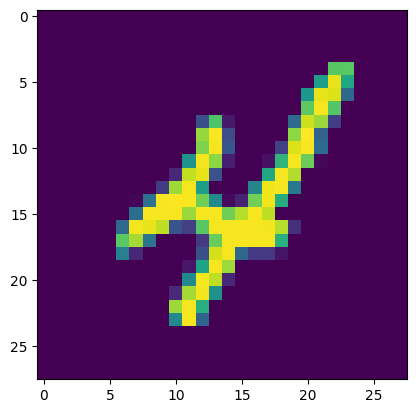

In [78]:
plt.imshow(X_train[9])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

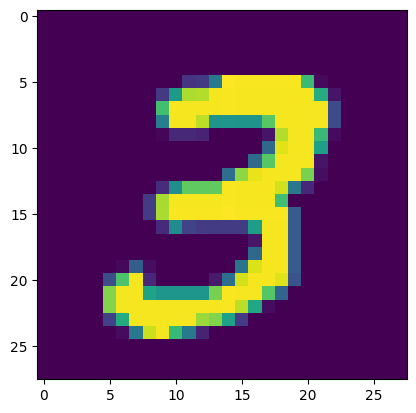

In [79]:
plt.imshow(X_train[7]) # showing image at index 7. You can try by changing 7 to any other value.
#what is the maximum index you can give?

plt

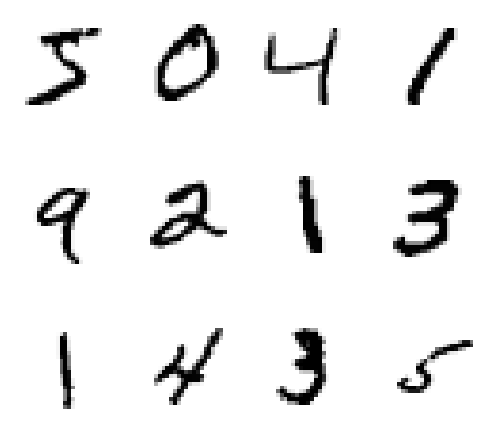

In [80]:
plt.figure(figsize=(5,5))
for k in range(12):
  plt.subplot(3,4,k+1)
  plt.imshow(X_train[k],cmap='Greys')
  plt.axis('off')
plt.tight_layout()
plt.show()


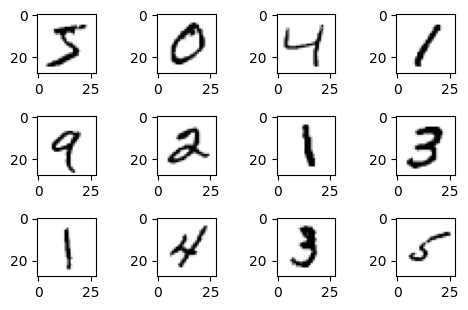

In [81]:
plt.figure(figsize=(5,5))
for k in range(12):
  plt.subplot(5,4,k+1)
  plt.imshow(X_train[k],cmap='Greys')
  plt.axis()
plt.tight_layout()
plt.show()

In [82]:
print(X_train[0]) # So this is the pattern for the above first image '5'

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### 3. Flattening 2-dimensional images to one dimension

In [83]:
#All features are in X_train and X_valid
X_train=X_train.reshape(60000,784).astype('float32')
X_valid=X_valid.reshape(10000,784).astype('float32')
#X_train and X_valid now will have decimal numbers instead of 0 to 255 integer values
print("X_train\n",X_train[0])
#Now see the pattern of X_tain[0] that is 5 as we printed above is converted to decimal.
#Like this all 60000 rows are converted to decimal.

X_train
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   

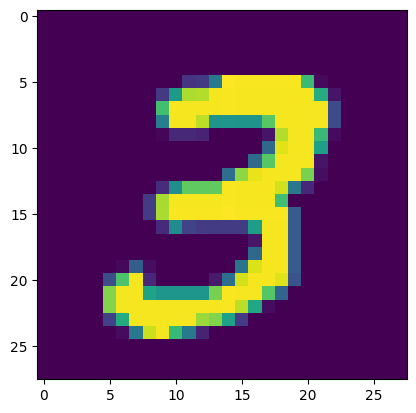

In [84]:
plt.imshow(X_train[7].reshape(28, 28))

###4. Scale

In [85]:
#devide by 255 all representations in 60000 rows  to make all the values fall in the range 0 to 1
X_train=X_train/255  # one way
X_valid/=255         # other way
print(X_train[0]) # Now compare previous and present outputs

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

###5. Convert the output labels to one-hot encoding

In [86]:
n_classes=10 # there are 10 digits 0 to 9 so we define 10 classes
#All class names are in y_train and y_valid
#One hot encoding is a technique that we use to represent categorical variables
#as numerical values
# For example 5 can be written as [0,0,0,0,0,1,0,0,0,0,0]
# For example 6 can be written as [0,0,0,0,0,0,1,0,0,0,0]
#The advantage is that we can determine probabilities for 10 classes
y_train=keras.utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.to_categorical(y_valid,n_classes)
for i in range(10):
  print(y_train[i])
# See here . This is the one-hot encoding for '5' in X_train[0]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


###6. Design the neural Network

In [87]:
# We create an object with name 'model' which is of type sequential

model=Sequential()
#Add a dense layer
# Now we stack layers using add()
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))
# hidden layer with input from array of size 784
#This hidden layer has our 64 sigmoid neurons
#These 64 neurons are fully connected
model.add(Dense(10,activation='softmax'))
# We add a dense layer with 10 neurons of type softmax-
#that means we use 10 probabilities for each of the 0 to 9 digits



In [88]:
#print the architecture of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Compile

In [89]:
from keras import metrics

In [90]:
model.compile(loss = 'mean_squared_error',
   optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

###Important arguments are


1.   loss function
2.   Optimizer
3.   metrics

loss function is set as mean_squared_error

optimizer is set as sgd

metrics is set as metrics.categorical_accuracy.

 fit() function is used to evaluate our model on training and also for graphical performance.


###Loss function

mean_squared_error
mean_absolute_error
mean_absolute_percentage_error
mean_squared_logarithmic_error
squared_hinge
hinge
categorical_hinge
logcosh
huber_loss
categorical_crossentropy
sparse_categorical_crossentropy
binary_crossentropy
kullback_leibler_divergence
poisson
cosine_proximity
is_categorical_crossentropy

###Train the neural network

In [91]:
model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(X_valid,y_valid))#next class


Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.0909 - categorical_accuracy: 0.1084 - val_loss: 0.0905 - val_categorical_accuracy: 0.1110
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0903 - categorical_accuracy: 0.1235 - val_loss: 0.0900 - val_categorical_accuracy: 0.1391
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0898 - categorical_accuracy: 0.1706 - val_loss: 0.0895 - val_categorical_accuracy: 0.2086
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0894 - categorical_accuracy: 0.2243 - val_loss: 0.0891 - val_categorical_accuracy: 0.2526
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0890 - categorical_accuracy: 0.2556 - val_loss: 0.0887 - val_categorical_accuracy: 0.2774
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0887 - categorical_accuracy: 0.2745 - val_loss: 0.0884 - val_categorical_accuracy: 0.2957
Epo

In [92]:
loss_and_metrics = model.evaluate(X_valid, y_valid, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.0830 - categorical_accuracy: 0.3908


###Train again

In [93]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

In [94]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(learning_rate = 0.002, beta_1 = 0.9, beta_2 = 0.999))

In [95]:
model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(X_valid,y_valid))#next class


Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.4900 - val_loss: 0.2646
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2352 - val_loss: 0.2004
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1815 - val_loss: 0.1656
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1485 - val_loss: 0.1445
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1257 - val_loss: 0.1279
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1085 - val_loss: 0.1174
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0954 - val_loss: 0.1104
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0846 - val_loss: 0.1028
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0749 - val_loss: 0.0975
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0673 - val_loss: 0.093

In [ ]:
loss_and_metrics = model.evaluate(X_valid, y_valid, batch_size=128)

In machine learning, Optimization is an important process which optimize the input weights by comparing the prediction and the loss function. Keras provides quite a few optimizer as a module, optimizers and they are as follows:

###SGD : Stochastic gradient descent optimizer.

keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.0, nesterov = False)

###RMSprop : RMSProp optimizer.

keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)

###Adagrad: Adagrad optimizer.

keras.optimizers.Adagrad(learning_rate = 0.01)

###Adadelta: Adadelta optimizer.

keras.optimizers.Adadelta(learning_rate = 1.0, rho = 0.95)

###Adam : Adam optimizer.

keras.optimizers.Adam(
   learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False
)

###Adamax : Adamax optimizer from Adam.

keras.optimizers.Adamax(learning_rate = 0.002, beta_1 = 0.9, beta_2 = 0.999)


###Nadam : Nesterov Adam optimizer.

keras.optimizers.Nadam(learning_rate = 0.002, beta_1 = 0.9, beta_2 = 0.999)
